In [1]:
import pandas as pd
import numpy as np
import os
import tqdm
from os import listdir
import librosa
import soundfile as sf
import shutil

In [3]:

directory = "C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/audio_and_txt_files"


In [4]:
content = listdir(directory)

In [5]:
content[0:10]

['101_1b1_Al_sc_Meditron.txt',
 '101_1b1_Al_sc_Meditron.wav',
 '101_1b1_Pr_sc_Meditron.txt',
 '101_1b1_Pr_sc_Meditron.wav',
 '102_1b1_Ar_sc_Meditron.txt',
 '102_1b1_Ar_sc_Meditron.wav',
 '103_2b2_Ar_mc_LittC2SE.txt',
 '103_2b2_Ar_mc_LittC2SE.wav',
 '104_1b1_Al_sc_Litt3200.txt',
 '104_1b1_Al_sc_Litt3200.wav']

In [6]:
patient_lung_data = []
l = [s for s in content if '.txt' in s]
for i in l:
  for lines in open(directory+'/'+i,'r').readlines():
    patient_lung_data.append([i.split('.')[0].split("_")[0],i.split('.')[0],lines.split()[0],lines.split()[1],lines.split()[2],lines.split()[3]])

In [8]:
def patient(x):
  patient_list = []
  patient_id = x.split('.')[0].split("_")[0]
  recording_index = x.split('.')[0].split("_")[1]
  chest_location = x.split('.')[0].split("_")[2]
  acquisition_mode = x.split('.')[0].split("_")[3]
  recording_equipment = x.split('.')[0].split("_")[4]
  filename = x.split('.')[0]

  patient_list.append(patient_id)
  patient_list.append(recording_index)
  patient_list.append(chest_location)
  patient_list.append(acquisition_mode)
  patient_list.append(recording_equipment)
  patient_list.append(filename)

  return patient_list



In [9]:

df = [patient(s) for s in content if '.txt' in s]

In [10]:
data = pd.DataFrame(df)

In [12]:
data.columns = ['patient_id','recording_index','chest_location','acquisition_mode','recording_equipment' ,'filename']

In [13]:
data.head()

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron
1,101,1b1,Pr,sc,Meditron,101_1b1_Pr_sc_Meditron
2,102,1b1,Ar,sc,Meditron,102_1b1_Ar_sc_Meditron
3,103,2b2,Ar,mc,LittC2SE,103_2b2_Ar_mc_LittC2SE
4,104,1b1,Al,sc,Litt3200,104_1b1_Al_sc_Litt3200


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           920 non-null    object
 1   recording_index      920 non-null    object
 2   chest_location       920 non-null    object
 3   acquisition_mode     920 non-null    object
 4   recording_equipment  920 non-null    object
 5   filename             920 non-null    object
dtypes: object(6)
memory usage: 43.3+ KB


In [21]:
lung_data = pd.DataFrame(patient_lung_data)
lung_data.head()

,0,1,2,3,4,5
0,101,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,101_1b1_Al_sc_Meditron,5.793,7.521,0,0


In [22]:
lung_data.columns = ['patient_id','filename','start','end','crackles','wheezes']

In [23]:
lung_data.head(10)

,patient_id,filename,start,end,crackles,wheezes
0,101,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,101_1b1_Al_sc_Meditron,5.793,7.521,0,0
5,101,101_1b1_Al_sc_Meditron,7.521,9.279,0,0
6,101,101_1b1_Al_sc_Meditron,9.279,11.15,0,0
7,101,101_1b1_Al_sc_Meditron,11.15,13.036,0,0
8,101,101_1b1_Al_sc_Meditron,13.036,14.721,0,0
9,101,101_1b1_Al_sc_Meditron,14.721,16.707,0,0


In [26]:
datay = data.merge(lung_data, how = 'outer',on = 'patient_id' and  'filename')
datay

,patient_id_x,recording_index,chest_location,acquisition_mode,recording_equipment,filename,patient_id_y,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,5.793,7.521,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6893,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,11.721,13.693,1,0
6894,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,13.693,15.536,0,0
6895,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,15.536,17.493,0,0
6896,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,17.493,19.436,1,0


In [28]:
datay.drop_duplicates()

,patient_id_x,recording_index,chest_location,acquisition_mode,recording_equipment,filename,patient_id_y,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,5.793,7.521,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6893,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,11.721,13.693,1,0
6894,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,13.693,15.536,0,0
6895,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,15.536,17.493,0,0
6896,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,17.493,19.436,1,0


In [29]:
patient_demographic = pd.read_csv('C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/patient_diagnosis.csv')
patient_demographic.head(10)

,101,URTI
0,102,Healthy
1,103,Asthma
2,104,COPD
3,105,URTI
4,106,COPD
5,107,COPD
6,108,LRTI
7,109,COPD
8,110,COPD
9,111,Bronchiectasis


In [30]:
patient_demographic.columns = ['patient_id','disease']

In [31]:
patient_demographic.head()

,patient_id,disease
0,102,Healthy
1,103,Asthma
2,104,COPD
3,105,URTI
4,106,COPD


In [32]:
patient_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  125 non-null    int64 
 1   disease     125 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [33]:
c1 = pd.DataFrame({'patient_id':[101],
                   'disease':['URTI']})
c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  1 non-null      int64 
 1   disease     1 non-null      object
dtypes: int64(1), object(1)
memory usage: 148.0+ bytes


In [34]:
patient_demographic = pd.concat([patient_demographic,c1])

In [35]:
patient_demographic['patient_id'].unique()

array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 101], dtype=int64)

In [36]:
datay = datay.drop('patient_id_y',axis= 1)

In [37]:
datay.rename(columns = {'patient_id_x':'patient_id'}, inplace = True)

In [38]:
datay.head()

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,5.793,7.521,0,0


In [39]:
daty = datay.convert_dtypes()

In [40]:
datay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           6898 non-null   object
 1   recording_index      6898 non-null   object
 2   chest_location       6898 non-null   object
 3   acquisition_mode     6898 non-null   object
 4   recording_equipment  6898 non-null   object
 5   filename             6898 non-null   object
 6   start                6898 non-null   object
 7   end                  6898 non-null   object
 8   crackles             6898 non-null   object
 9   wheezes              6898 non-null   object
dtypes: object(10)
memory usage: 539.0+ KB


In [41]:
datay['patient_id'] = datay['patient_id'].astype('int64')

In [42]:
datay['patient_id'].dtype

dtype('int64')

In [43]:
patient_demographic[patient_demographic['patient_id'] == 101]

,patient_id,disease
0,101,URTI


In [44]:
datay['start'] = datay['start'].astype('float64')
datay['end'] = datay['end'].astype('float64')
datay['crackles'] = datay['crackles'].astype('int64')
datay['wheezes'] = datay['wheezes'].astype('int64')

In [45]:
datay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           6898 non-null   int64  
 1   recording_index      6898 non-null   object 
 2   chest_location       6898 non-null   object 
 3   acquisition_mode     6898 non-null   object 
 4   recording_equipment  6898 non-null   object 
 5   filename             6898 non-null   object 
 6   start                6898 non-null   float64
 7   end                  6898 non-null   float64
 8   crackles             6898 non-null   int64  
 9   wheezes              6898 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 539.0+ KB


In [46]:
def recording_to_clips(root, start, end, sr = 44100):

  maximum_index = len(root)
  start_index = min(int(start*sr), maximum_index)
  end_index = min(int(end*sr), maximum_index)
  return root[start_index:end_index]

In [47]:
os.makedirs('/content/sample_data/processed_clips')

In [48]:
i = 0
n = 0
for index, rows in tqdm.tqdm(datay.iterrows()):
  max_length = 6
  start_time = rows['start']
  end_time = rows['end']
  filename = rows['filename']

  if end_time - start_time > max_length:
    end = start_time + max_length

  audio_file_path = directory + '/' + filename + '.wav'

  if index > 0:
    if datay.iloc[index-1]['filename'] == filename:
      i += 1
    else:
      i = 0

  filename = filename + '_' + str(i) + '.wav'
  save_path = '/content/sample_data/processed_clips/'+filename
  n += 1

  audio, sample_rate = librosa.load(audio_file_path)
  sample = recording_to_clips(audio,start_time,end_time,sample_rate)

  required_length = max( 6*sample_rate, len(sample))
  padded_data = librosa.util.pad_center(sample,size = required_length)

  sf.write(file = save_path,data = padded_data, samplerate = sample_rate)

  # print('total files processed:', n)

0it [00:00, ?it/s]

6898it [02:10, 52.66it/s]


In [49]:
path = '/content/sample_data/processed_clips/'


In [50]:
lll = [[s.split("_")[0],s] for s in os.listdir(path = path)]
patient_data = pd.DataFrame(lll,columns = ['patient_id','filename'])
patient_data

,patient_id,filename
0,101,101_1b1_Al_sc_Meditron_0.wav
1,101,101_1b1_Al_sc_Meditron_1.wav
2,101,101_1b1_Al_sc_Meditron_10.wav
3,101,101_1b1_Al_sc_Meditron_11.wav
4,101,101_1b1_Al_sc_Meditron_2.wav
...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.wav
6894,226,226_1b1_Pl_sc_LittC2SE_6.wav
6895,226,226_1b1_Pl_sc_LittC2SE_7.wav
6896,226,226_1b1_Pl_sc_LittC2SE_8.wav


In [51]:
patient_data['patient_id'] = patient_data['patient_id'].astype('int64')

In [52]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  6898 non-null   int64 
 1   filename    6898 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.9+ KB


In [53]:
final_data = patient_data.merge(patient_demographic, how = 'outer', on = 'patient_id')
final_data

,patient_id,filename,disease
0,101,101_1b1_Al_sc_Meditron_0.wav,URTI
1,101,101_1b1_Al_sc_Meditron_1.wav,URTI
2,101,101_1b1_Al_sc_Meditron_10.wav,URTI
3,101,101_1b1_Al_sc_Meditron_11.wav,URTI
4,101,101_1b1_Al_sc_Meditron_2.wav,URTI
...,...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.wav,Pneumonia
6894,226,226_1b1_Pl_sc_LittC2SE_6.wav,Pneumonia
6895,226,226_1b1_Pl_sc_LittC2SE_7.wav,Pneumonia
6896,226,226_1b1_Pl_sc_LittC2SE_8.wav,Pneumonia


In [54]:
final_data[['patient_id','disease']].value_counts()

patient_id  disease       
130         COPD              507
107         COPD              231
158         COPD              217
154         COPD              208
178         COPD              208
                             ... 
196         Bronchiectasis      6
189         COPD                5
128         COPD                5
209         Healthy             4
190         URTI                4
Name: count, Length: 126, dtype: int64

In [55]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test, Y_train, Y_test = train_test_split(final_data, final_data['disease'],stratify  = final_data['disease'], random_state = 43, test_size = 0.25)

In [57]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5173, 3)
(5173,)
(1725, 3)
(1725,)


In [58]:
X_train.head()

,patient_id,filename,disease
157,107,107_2b3_Pl_mc_AKGC417L_2.wav,COPD
4901,186,186_2b3_Al_mc_AKGC417L_4.wav,COPD
6225,211,211_1p2_Ar_mc_AKGC417L_0.wav,COPD
6461,213,213_2p2_Pr_mc_AKGC417L_3.wav,COPD
294,107,107_3p2_Al_mc_AKGC417L_3.wav,COPD


In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

In [60]:
def feature_shape(feature):
  ushape = [np.shape(sub_list) for sub_list in feature]
  return set(ushape)


def feature_padding(feature):
  min_shape = min(sub_array.shape for sub_list in feature for sub_array in sub_list)
  print(min_shape, type(min_shape))
  # Padding each subarray to the minimum shape with zeros
  feature_padded = [[sub_array[:min_shape[0]] for sub_array in sub_list] for sub_list in feature]
  return feature_padded



In [61]:
def get_features_from_audio(path):
    soundArr,sample_rate= librosa.load(path)
    mfcc=librosa.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=librosa.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=librosa.feature.melspectrogram(y=soundArr,sr=sample_rate)
    tone = librosa.feature.tonnetz(y=soundArr,sr=sample_rate)
    specCen = librosa.feature.spectral_centroid(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec,tone, specCen

In [62]:
root = '/content/sample_data/processed_clips/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in tqdm.tqdm(X_test.iterrows()):
    path=root + row['filename']
    a,b,c,d,e=get_features_from_audio(path)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)

2it [00:00,  3.37it/s]c:\Users\mahii\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
1725it [06:22,  4.51it/s]


In [63]:
print(feature_shape(mfcc))

{(20, 377), (20, 267), (20, 276), (20, 697), (20, 288), (20, 315), (20, 260), (20, 263), (20, 269), (20, 272), (20, 336), (20, 278), (20, 284), (20, 348), (20, 287), (20, 259), (20, 274), (20, 338), (20, 277), (20, 356)}


In [64]:
print(feature_shape(cstft))

{(12, 315), (12, 260), (12, 263), (12, 272), (12, 269), (12, 336), (12, 278), (12, 284), (12, 348), (12, 287), (12, 259), (12, 274), (12, 338), (12, 277), (12, 356), (12, 377), (12, 267), (12, 697), (12, 276), (12, 288)}


In [65]:
print(feature_shape(mSpec))

{(128, 377), (128, 267), (128, 697), (128, 276), (128, 288), (128, 315), (128, 260), (128, 263), (128, 269), (128, 272), (128, 278), (128, 336), (128, 287), (128, 284), (128, 348), (128, 259), (128, 274), (128, 338), (128, 277), (128, 356)}


In [66]:
mfcc_padded = feature_padding(mfcc)

(259,) <class 'tuple'>


In [67]:
cstft_padded = feature_padding(cstft)

(259,) <class 'tuple'>


In [68]:
mSpec_padded = feature_padding(mSpec)

(259,) <class 'tuple'>


In [69]:
mfcc_test = np.array(mfcc_padded)
cstft_test = np.array(cstft_padded)
mSpec_test = np.array(mSpec_padded)

print(f"mfcc: {mfcc_test.shape}")
print(f"cstft: {cstft_test.shape}")
print(f"mSpec: {mSpec_test.shape}")

mfcc: (1725, 20, 259)
cstft: (1725, 12, 259)
mSpec: (1725, 128, 259)


In [70]:
root = '/content/sample_data/processed_clips/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in tqdm.tqdm(X_train.iterrows()):
    path=root + row['filename']
    a,b,c,d,e=get_features_from_audio(path)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)




5173it [24:15,  3.55it/s]


In [71]:
mfcc_shape = feature_shape(mfcc)
print(mfcc_shape)

{(20, 304), (20, 371), (20, 328), (20, 267), (20, 264), (20, 270), (20, 276), (20, 273), (20, 288), (20, 407), (20, 285), (20, 300), (20, 483), (20, 303), (20, 428), (20, 370), (20, 309), (20, 315), (20, 321), (20, 260), (20, 263), (20, 269), (20, 397), (20, 281), (20, 278), (20, 287), (20, 351), (20, 357), (20, 302), (20, 299), (20, 314), (20, 311), (20, 317), (20, 375), (20, 262), (20, 259), (20, 329), (20, 268), (20, 274), (20, 338), (20, 277), (20, 286), (20, 295), (20, 353), (20, 362), (20, 301)}


In [72]:
cstft_shape = feature_shape(cstft)
print(cstft_shape)

{(12, 483), (12, 303), (12, 428), (12, 370), (12, 309), (12, 315), (12, 260), (12, 263), (12, 321), (12, 397), (12, 269), (12, 281), (12, 278), (12, 287), (12, 351), (12, 357), (12, 299), (12, 302), (12, 311), (12, 317), (12, 375), (12, 262), (12, 314), (12, 259), (12, 329), (12, 268), (12, 274), (12, 338), (12, 277), (12, 286), (12, 353), (12, 362), (12, 301), (12, 295), (12, 304), (12, 371), (12, 267), (12, 264), (12, 270), (12, 328), (12, 273), (12, 276), (12, 407), (12, 285), (12, 288), (12, 300)}


In [73]:
mspec = feature_shape(mSpec)
print(mspec)

{(128, 264), (128, 328), (128, 267), (128, 273), (128, 270), (128, 276), (128, 285), (128, 288), (128, 407), (128, 300), (128, 370), (128, 309), (128, 428), (128, 483), (128, 303), (128, 315), (128, 321), (128, 260), (128, 263), (128, 269), (128, 278), (128, 397), (128, 281), (128, 287), (128, 351), (128, 299), (128, 357), (128, 302), (128, 311), (128, 375), (128, 314), (128, 259), (128, 317), (128, 262), (128, 329), (128, 268), (128, 274), (128, 338), (128, 277), (128, 286), (128, 295), (128, 353), (128, 304), (128, 362), (128, 301), (128, 371)}


In [74]:
mfcc_padded = feature_padding(mfcc)
cstft_padded = feature_padding(cstft)
mSpec_padded = feature_padding(mSpec)

(259,) <class 'tuple'>
(259,) <class 'tuple'>
(259,) <class 'tuple'>


In [75]:
mfcc_train = np.array(mfcc_padded)
cstft_train = np.array(cstft_padded)
mSpec_train = np.array(mSpec_padded)

print(mfcc_train.shape)
print(cstft_train.shape)
print(mSpec_train.shape)

(5173, 20, 259)
(5173, 12, 259)
(5173, 128, 259)


In [76]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
),
    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=5,
    verbose=1,
    mode="min",
    min_lr=0.00001,
)
]

C:\Users\mahii\AppData\Local\Temp\ipykernel_14092\237117300.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = final_data['disease'],palette = "pastel")


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'URTI'),
  Text(1, 0, 'Healthy'),
  Text(2, 0, 'Asthma'),
  Text(3, 0, 'COPD'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

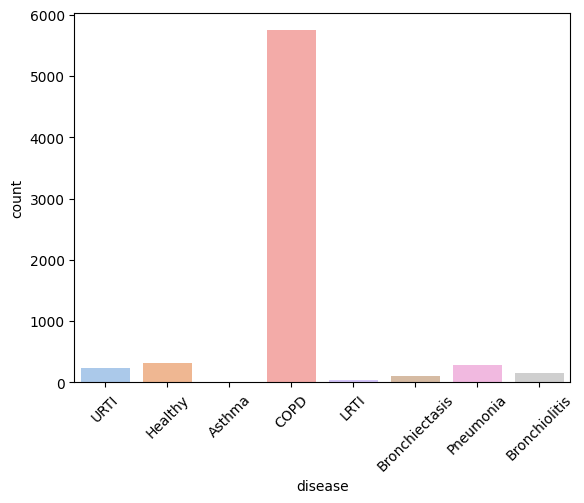

In [78]:
sns.countplot(x = final_data['disease'],palette = "pastel")
plt.xticks(rotation = 45)

C:\Users\mahii\AppData\Local\Temp\ipykernel_14092\3365851312.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = patient_demographic['disease'],palette = "pastel")


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Healthy'),
  Text(1, 0, 'Asthma'),
  Text(2, 0, 'COPD'),
  Text(3, 0, 'URTI'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

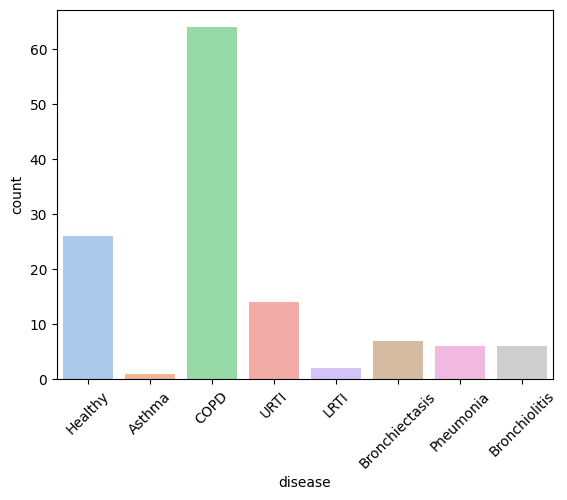

In [79]:
sns.countplot(x = patient_demographic['disease'],palette = "pastel")
plt.xticks(rotation = 45)

In [80]:
mfcc_input=keras.layers.Input(shape=(20,259,1),name="mfccInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.GlobalMaxPooling2D()(x)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [81]:
mfcc_model.summary()

Model: "mfccModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mfccInput (InputLayer)          │ (None, 20, 259, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 20, 87, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 87, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 20, 87, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 11, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 11, 96)      │        24,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 11, 96)      │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 5, 11, 96)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 5, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 5, 128)      │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 2, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,560 (369.38 KB)

 Trainable params: 93,920 (366.88 KB)

 Non-trainable params: 640 (2.50 KB)

In [82]:
cstft_input=keras.layers.Input(shape=(12,259,1),name="cstftInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(cstft_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
cstft_output=keras.layers.GlobalMaxPooling2D()(x)

cstft_model=keras.Model(cstft_input, cstft_output, name="cstftModel")

In [83]:
cstft_model.summary()

Model: "cstftModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cstftInput (InputLayer)         │ (None, 12, 259, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 87, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 87, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 12, 87, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 43, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 22, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 22, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 6, 22, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 11, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 11, 96)      │        24,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 11, 96)      │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 3, 11, 96)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 5, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 1, 5, 128)      │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 1, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,560 (369.38 KB)

 Trainable params: 93,920 (366.88 KB)

 Non-trainable params: 640 (2.50 KB)

In [84]:
mspec_input=keras.layers.Input(shape=(128,259,1),name="mspecInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mspec_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mspec_output=keras.layers.GlobalMaxPooling2D()(x)

mspec_model=keras.Model(mspec_input, mspec_output, name="mspecModel")



In [85]:
print(type(mspec_model))

<class 'keras.src.models.functional.Functional'>


In [86]:
mspec_model.summary()

Model: "mspecModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mspecInput (InputLayer)         │ (None, 128, 259, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 87, 32)    │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128, 87, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128, 87, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 11, 96)     │        24,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 11, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32, 11, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 5, 96)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 5, 128)     │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 5, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 16, 5, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,560 (369.38 KB)

 Trainable params: 93,920 (366.88 KB)

 Non-trainable params: 640 (2.50 KB)

In [87]:
input_mfcc=keras.layers.Input(shape=(20,259,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)

input_cstft=keras.layers.Input(shape=(12,259,1),name="cstft")
cstft=cstft_model(input_cstft)

input_mSpec=keras.layers.Input(shape=(128,259,1),name="mspec")
mSpec=mspec_model(input_mSpec)


concat=keras.layers.concatenate([mfcc,cstft,mSpec])
hidden=keras.layers.Dropout(0.2)(concat)
hidden=keras.layers.Dense(50,activation='relu')(concat)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net=keras.Model([input_mfcc,input_cstft,input_mSpec], output, name="Net")

In [88]:
print(type(mfcc))

<class 'keras.src.backend.common.keras_tensor.KerasTensor'>


In [89]:
net.summary()

Model: "Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ mfcc (InputLayer)   │ (None, 20, 259,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cstft (InputLayer)  │ (None, 12, 259,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mspec (InputLayer)  │ (None, 128, 259,  │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mfccModel           │ (None, 128)       │     94,560 │ mfcc[0][0]        │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cstftModel          │ (None, 128)       │     94,560 │ cstft[0][0]       │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mspecModel          │ (None, 128)       │     94,560 │ mspec[0][0]       │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ mfccModel[0][0],  │
│ (Concatenate)       │                   │            │ cstftModel[0][0], │
│                     │                   │            │ mspecModel[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 50)        │     19,250 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 50)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 25)        │      1,275 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 25)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8)         │        208 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 304,413 (1.16 MB)

 Trainable params: 302,493 (1.15 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [90]:
import keras
import tensorflow as tf

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

net.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# tf.keras.backend.set_value(net.optimizer.learning_rate, 0.001)


In [91]:
history=net.fit(
    {"mfcc":mfcc_train,"cstft":cstft_train,"mspec":mSpec_train},
    Y_train,
    validation_data=({"mfcc":mfcc_test,"cstft":cstft_test,"mspec":mSpec_test},Y_test),
    epochs=100,verbose=1,
    callbacks=my_callbacks
)

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 118s 620ms/step - accuracy: 0.7270 - loss: 0.9694 - val_accuracy: 0.8301 - val_loss: 0.8683 - learning_rate: 0.0010
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 99s 613ms/step - accuracy: 0.8333 - loss: 0.5391 - val_accuracy: 0.8458 - val_loss: 0.4687 - learning_rate: 0.0010
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 81s 503ms/step - accuracy: 0.8428 - loss: 0.4549 - val_accuracy: 0.7838 - val_loss: 0.5992 - learning_rate: 0.0010
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 100s 618ms/step - accuracy: 0.8419 - loss: 0.4307 - val_accuracy: 0.8493 - val_loss: 0.4121 - learning_rate: 0.0010
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 85s 525ms/step - accuracy: 0.8528 - loss: 0.4085 - val_accuracy: 0.8232 - val_loss: 0.4919 - learning_rate: 0.0010
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 74s 456ms/step - accuracy: 0.8605 - loss: 0.3779 - val_accuracy: 0.8522 - val_loss: 0.5177 - learning_rate: 0.0010
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 79s 489ms/step - accu

In [102]:
net.save('lung_classification.keras')

In [107]:
y_pred = net.predict([mfcc_test,cstft_test,mSpec_test])

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [105]:
mfcc_test[0]

array([[-457.49643, -457.49643, -457.49643, ..., -457.49643, -457.49643,
        -457.49643],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       ...,
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ],
       [   0.     ,    0.     ,    0.     , ...,    0.     ,    0.     ,
           0.     ]], dtype=float32)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
def predict(y_pred):
    # y_pred = net.predict([mfcc_test,cstft_test,mSpec_test])
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(y_pred_classes)
    y_true = Y_test
    mapping = {
        0: 'Asthma',
        1: 'Bronchiectasis',
        2: 'Bronchiolitis',
        3: 'COPD',
        4: 'Healthy',
        5: 'LRTI',
        6: 'Pneumonia',
        7: 'URTI'
    }

    # Replace numerical labels with original labels
    predictions = [mapping[label] for label in y_pred_classes]
    accuracy = accuracy_score(y_true, y_pred_classes)
    print("Test Accuracy:", accuracy)
    
    return predictions

In [110]:
predict(y_pred)

[3 3 6 ... 3 3 3]
Test Accuracy: 0.9107246376811594


['COPD',
 'COPD',
 'Pneumonia',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Bronchiectasis',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Healthy',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Pneumonia',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Pneumonia',
 'COPD',
 'COPD',
 'COPD',
 'Pneumonia',
 'URTI',
 'Healthy',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Bronchiectasis',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Pneumonia',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'COPD',
 'Pneumonia',
 'COPD',
 'COPD',

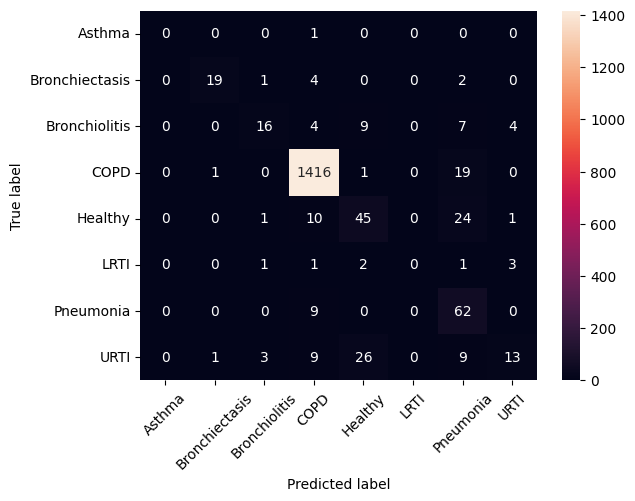

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_classes = np.argmax(y_pred, axis=1)
y_true = Y_test

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mtx, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_)

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Display the plot
plt.show()

In [148]:
import wave

with wave.open("C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/audio_and_txt_files/117_1b2_Tc_mc_LittC2SE.wav") as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)

print(duration)

20.0


In [149]:
def recording_to_clips(root, start, end, sr = 44100):

  maximum_index = len(root)
  start_index = min(int(start*sr), maximum_index)
  end_index = min(int(end*sr), maximum_index)
  return root[start_index:end_index]

In [151]:
shutil.rmtree('/content/sample_data/sample_clips/')

In [152]:
os.mkdir('/content/sample_data/sample_clips/')

In [153]:
def split_audio(duration,audio_path):
  i = 0
  n = 0
  max_length = 6
  start_time = 0
  end_time = max_length
  duml = 0
  if duration%max_length == 0:
    duml = int(duration / max_length)
  else:
    duml  = int(duration / max_length) + 1

  for j in range(duml):

    if end_time - start_time > max_length:
      end = start_time + max_length  
    
    filename = str(i) + '.wav'
    save_path = '/content/sample_data/sample_clips/'+filename
    n += 1
    i += 1

    audio, sample_rate = librosa.load(audio_path)
    sample = recording_to_clips(audio,start_time,end_time,sample_rate)

    required_length = max( 6*sample_rate, len(sample))
    padded_data = librosa.util.pad_center(sample,size = required_length)

    sf.write(file = save_path,data = padded_data, samplerate = sample_rate)

    start_time = end_time
    end_time += max_length
    
    # print('total files processed:', n)

In [173]:
audio_path = 'C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/audio_and_txt_files/104_1b1_Ll_sc_Litt3200.wav'
split_audio(duration,audio_path)

In [174]:
sample_path = '/content/sample_data/sample_clips/'

In [175]:
cont = os.listdir(sample_path)
cont

['0.wav', '1.wav', '2.wav', '3.wav']

In [176]:
sample_data = pd.DataFrame(cont)

In [177]:
sample_data.columns = ['filename']

In [178]:
sample_data

,filename
0,0.wav
1,1.wav
2,2.wav
3,3.wav


In [179]:
def feature_shape(feature):
  ushape = [np.shape(sub_list) for sub_list in feature]
  return set(ushape)


def feature_padding(feature):
  min_shape = min(sub_array.shape for sub_list in feature for sub_array in sub_list)
  print(min_shape, type(min_shape))
  # Padding each subarray to the minimum shape with zeros
  feature_padded = [[sub_array[:min_shape[0]] for sub_array in sub_list] for sub_list in feature]
  return feature_padded



In [180]:
def get_features_from_audio(path):
    soundArr,sample_rate= librosa.load(path)
    mfcc=librosa.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=librosa.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=librosa.feature.melspectrogram(y=soundArr,sr=sample_rate)
    tone = librosa.feature.tonnetz(y=soundArr,sr=sample_rate)
    specCen = librosa.feature.spectral_centroid(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec,tone, specCen

In [181]:
root = '/content/sample_data/sample_clips/'
mfcc_sample,cstft_sample,mSpec_sample=[],[],[]

for idx,row in tqdm.tqdm(sample_data.iterrows()):
    path=root + row['filename']
    a,b,c,d,e=get_features_from_audio(path)
    mfcc_sample.append(a)
    cstft_sample.append(b)
    mSpec_sample.append(c)


3it [00:00,  5.10it/s]c:\Users\mahii\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
4it [00:00,  5.31it/s]


In [182]:
feature_shape(mfcc_sample)

{(20, 259)}

In [183]:
feature_shape(cstft_sample)

{(12, 259)}

In [184]:
feature_shape(mSpec_sample)

{(128, 259)}

In [185]:
mfcc_sample_padded = feature_padding(mfcc_sample)
cstft_sample_padded = feature_padding(cstft_sample)
mSpec_sample_padded = feature_padding(mSpec_sample)

(259,) <class 'tuple'>
(259,) <class 'tuple'>
(259,) <class 'tuple'>


In [186]:
mfcc_sample_array = np.array(mfcc_sample_padded)
cstft_sample_array = np.array(cstft_sample_padded)
mSpec_sample_array = np.array(mSpec_sample_padded)

In [187]:
print(mfcc_sample_array.shape)
print(cstft_sample_array.shape)
print(mSpec_sample_array.shape)

(4, 20, 259)
(4, 12, 259)
(4, 128, 259)


In [188]:
sample_pred = net.predict([mfcc_sample_array,cstft_sample_array,mSpec_sample_array])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [189]:
def predict1(y_pred):
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(y_pred_classes)

    mapping = {
        0: 'Asthma',
        1: 'Bronchiectasis',
        2: 'Bronchiolitis',
        3: 'COPD',
        4: 'Healthy',
        5: 'LRTI',
        6: 'Pneumonia',
        7: 'URTI'
    }

    # Replace numerical labels with original labels
    predictions = [mapping[label] for label in y_pred_classes]
    # accuracy = accuracy_score(y_true, y_pred_classes)
    # print("Test Accuracy:", accuracy)
    
    return predictions

In [190]:
predict1(sample_pred)

[3 3 3 3]


['COPD', 'COPD', 'COPD', 'COPD']

In [172]:
shutil.rmtree('/content/sample_data/processed_clips')